In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('Task01_Dataset.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

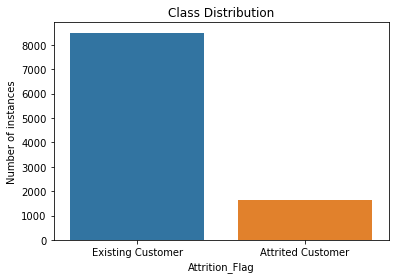

In [8]:
# Count the number of instances for each class
out_col = 'Attrition_Flag'

# Plot a bar chart to visualize the class imbalance
sns.countplot(x = out_col, data = data)
plt.title('Class Distribution')
plt.xlabel('Attrition_Flag')
plt.ylabel('Number of instances')
plt.show()

In [9]:
output_mapping_int = {'Existing Customer':0, 'Attrited Customer':1}
data['Attrition_Flag'] = data['Attrition_Flag'].replace(output_mapping_int)

In [10]:
# Handle missing values
# Not needed here but you should keep it in you pipeline just to be sure
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [11]:

# Convert categorical variables to numerical variables
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])


## Feature Selection

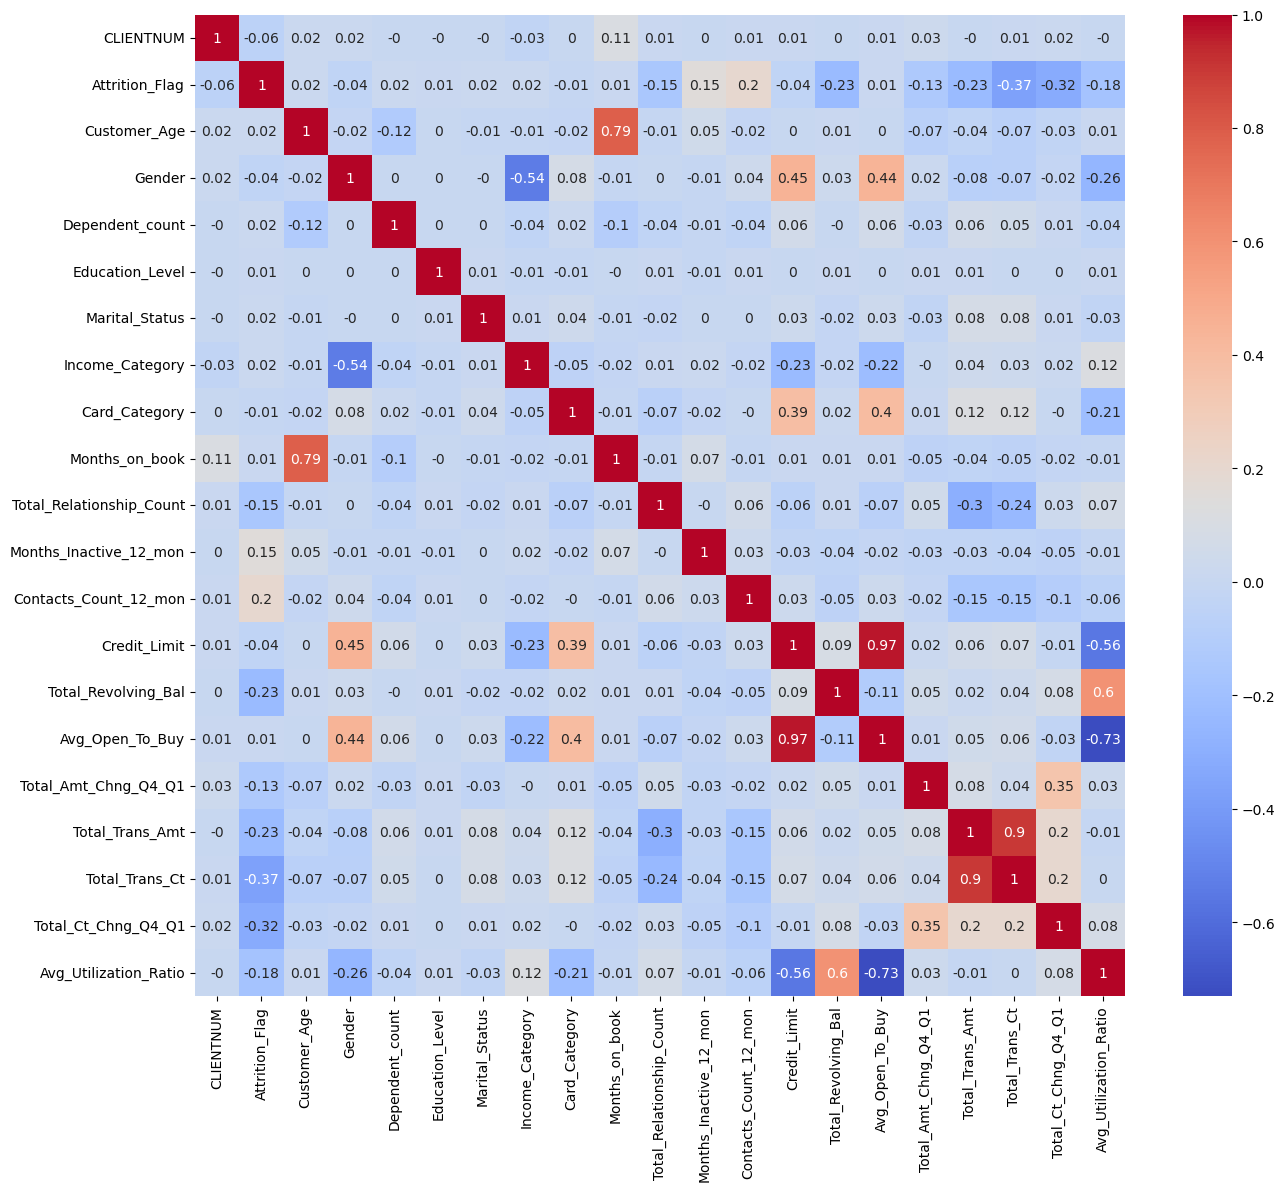

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Use correlation matrix to identify the most relevant features
correlation_matrix = round(data.corr(), 2)

plt.figure(dpi = 100, figsize = (15, 13))
sns.heatmap(correlation_matrix, cmap = "coolwarm", annot = True)
plt.show()


In [13]:
import numpy as np


# Find the indices of the features with high correlation
indices = np.where(np.abs(correlation_matrix) > 0.8)

# Remove the highly correlated features
cols_to_drop = []
for i, j in zip(*indices):
    if i != j and i not in cols_to_drop:
        cols_to_drop.append(j)

data.columns[cols_to_drop]

Index(['Avg_Open_To_Buy', 'Total_Trans_Ct'], dtype='object')

In [14]:
top_k_features = [col for col in data.columns if col not in cols_to_drop]
top_k_features

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [15]:
# Split the data into features and target
X = data[top_k_features].drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']


In [16]:
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,7152,19,1,3,3,1,2,0,26,4,1,3,4623,324,4935,987,217,32,791,58
1,9812,23,0,5,2,2,4,0,31,5,1,2,3623,408,3949,1073,338,23,829,102
2,3053,25,1,3,2,1,3,0,23,3,1,0,1623,0,2485,1154,893,10,818,0
3,7204,14,0,4,3,3,4,0,21,2,4,1,1552,1973,686,1020,236,10,818,757
4,501,14,1,3,5,1,2,0,8,4,1,0,2363,0,3089,1145,65,18,821,0


In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [18]:
# Scale the data to improve model performance
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Select the top K features using feature importance techniques, from the remaining features
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

## Algorithm Selection

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Choose a set of classification algorithms to evaluate
algorithms = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]


In [22]:
# Train each algorithm on the training set with the selected features
for name, algorithm in algorithms:
    algorithm.fit(X_train, y_train)

## Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the performance of each model using different metrics
for name, algorithm in algorithms:
    y_pred = algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(classification_report(y_test, y_pred))
    print('For the prefered label:')
    print(f'{name}:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}\n\n')


              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1699
           1       0.78      0.58      0.67       327

    accuracy                           0.91      2026
   macro avg       0.85      0.78      0.81      2026
weighted avg       0.90      0.91      0.90      2026

For the prefered label:
Logistic Regression:
Accuracy: 0.9067127344521224
Precision: 0.7827868852459017
Recall: 0.5840978593272171
F1-score: 0.669001751313485


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.78      0.79      0.79       327

    accuracy                           0.93      2026
   macro avg       0.87      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026

For the prefered label:
Decision Tree:
Accuracy: 0.9304047384007897
Precision: 0.7801204819277109
Recall: 0.7920489296636085
F1-score: 0.7860394537177542


              precision    re

## One of the problems we see in the data is the imbalance in the labels. If we fix that then it might improve the model performance

In [24]:
data.Attrition_Flag.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [25]:
from sklearn.utils import resample

# Upsample minority class
data_minority = data[data.Attrition_Flag == 1]
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data[data.Attrition_Flag == 0]),  # match number of majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data[data.Attrition_Flag == 0], data_minority_upsampled])


In [26]:
data_upsampled.shape

(17000, 21)

In [27]:
# Split the data into features and target
X = data_upsampled[top_k_features].drop('Attrition_Flag', axis=1)
y = data_upsampled['Attrition_Flag']


In [28]:
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,7152,19,1,3,3,1,2,0,26,4,1,3,4623,324,4935,987,217,32,791,58
1,9812,23,0,5,2,2,4,0,31,5,1,2,3623,408,3949,1073,338,23,829,102
2,3053,25,1,3,2,1,3,0,23,3,1,0,1623,0,2485,1154,893,10,818,0
3,7204,14,0,4,3,3,4,0,21,2,4,1,1552,1973,686,1020,236,10,818,757
4,501,14,1,3,5,1,2,0,8,4,1,0,2363,0,3089,1145,65,18,821,0


In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9211    1
5857    1
5886    1
7550    1
9950    1
Name: Attrition_Flag, Length: 17000, dtype: int64

In [30]:
# Scale the data to improve model performance
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


In [31]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Select the top K features using feature importance techniques, from the remaining features
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Choose a set of classification algorithms to evaluate
algorithms = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]


In [34]:
# Train each algorithm on the training set with the selected features
for name, algorithm in algorithms:
    algorithm.fit(X_train, y_train)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the performance of each model using different metrics
for name, algorithm in algorithms:
    y_pred = algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f'{name}:')
    print(classification_report(y_test, y_pred))
    print('For the prefered label:')
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}\n\n')


Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1687
           1       0.82      0.84      0.83      1713

    accuracy                           0.83      3400
   macro avg       0.83      0.83      0.83      3400
weighted avg       0.83      0.83      0.83      3400

For the prefered label:
Accuracy: 0.826764705882353
Precision: 0.822617680826636
Recall: 0.8365440747227088
F1-score: 0.8295224312590449


Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1687
           1       0.95      1.00      0.98      1713

    accuracy                           0.97      3400
   macro avg       0.98      0.97      0.97      3400
weighted avg       0.98      0.97      0.97      3400

For the prefered label:
Accuracy: 0.975
Precision: 0.9542410714285714
Recall: 0.9982486865148862
F1-score: 0.9757489300998573


Random Forest:
              precision    r

## Hyperparameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV

# Create Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Define hyperparameters to test
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create Grid Search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit Grid Search object to data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(grid_search.best_params_)

for name, algorithm in [('Logistic Regression', grid_search)]:
    y_pred = algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f'{name}:')
    print(classification_report(y_test, y_pred))
    print('For the prefered label:')
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}\n\n')

{'C': 0.1, 'penalty': 'l1'}
Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1687
           1       0.82      0.84      0.83      1713

    accuracy                           0.83      3400
   macro avg       0.83      0.83      0.83      3400
weighted avg       0.83      0.83      0.83      3400

For the prefered label:
Accuracy: 0.8252941176470588
Precision: 0.8202633085289067
Recall: 0.8365440747227088
F1-score: 0.8283236994219653




In [41]:
# Create Decision Tree model
model = DecisionTreeClassifier()

# Define hyperparameters to test
param_grid = {
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}

# Create Grid Search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit Grid Search object to data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(grid_search.best_params_)

for name, algorithm in [('Decision Tree', grid_search)]:
    y_pred = algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f'{name}:')
    print(classification_report(y_test, y_pred))
    print('For the prefered label:')
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}\n\n')

{'criterion': 'entropy', 'max_depth': 10}
Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1687
           1       0.94      0.98      0.96      1713

    accuracy                           0.96      3400
   macro avg       0.96      0.96      0.96      3400
weighted avg       0.96      0.96      0.96      3400

For the prefered label:
Accuracy: 0.9564705882352941
Precision: 0.9388670779584969
Recall: 0.9772329246935202
F1-score: 0.9576659038901602




In [44]:
# Create Random Forest model
model = RandomForestClassifier()

# Define hyperparameters to test
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}

# Create Grid Search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit Grid Search object to data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(grid_search.best_params_)

for name, algorithm in [('Random Forest', grid_search)]:
    y_pred = algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f'{name}:')
    print(classification_report(y_test, y_pred))
    print('For the prefered label:')
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}\n\n')

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1687
           1       0.95      0.99      0.97      1713

    accuracy                           0.97      3400
   macro avg       0.97      0.97      0.97      3400
weighted avg       0.97      0.97      0.97      3400

For the prefered label:
Accuracy: 0.9682352941176471
Precision: 0.9460811561978877
Recall: 0.9935785172212492
F1-score: 0.969248291571754




In [45]:
# Create SVM model
model = SVC()

# Define hyperparameters to test
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create Grid Search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit Grid Search object to data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(grid_search.best_params_)

for name, algorithm in [('SVM', grid_search)]:
    y_pred = algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f'{name}:')
    print(classification_report(y_test, y_pred))
    print('For the prefered label:')
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}\n\n')

{'C': 100, 'kernel': 'rbf'}
SVM:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1687
           1       0.93      0.99      0.96      1713

    accuracy                           0.96      3400
   macro avg       0.96      0.96      0.96      3400
weighted avg       0.96      0.96      0.96      3400

For the prefered label:
Accuracy: 0.9582352941176471
Precision: 0.9318306761957119
Recall: 0.989492119089317
F1-score: 0.9597961494903737


